In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import joblib

import os
import sys

In [2]:
os.getcwd()

'/Users/leah/Columbia/courses/19summer/microbialdynamics'

In [3]:
sys.path.append('/Users/leah/Columbia/courses/19summer/microbialdynamics')

In [4]:
from src.distribution.mvn import tf_mvn

In [5]:
from src.model import SSM

In [6]:
hidden_train, hidden_test, obs_train, obs_test, input_train, input_test = joblib.load("data/fhn_with_inputs")


In [7]:
hidden_train.shape

(200, 200, 2)

In [11]:
input_train.shape

(200, 200, 1)

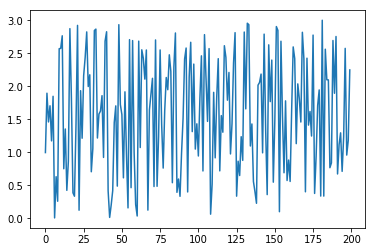

In [12]:
plt.plot(input_train[0,:,0])

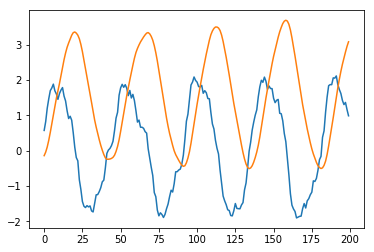

In [25]:
plt.plot(hidden_train[0,:,0])
plt.plot(hidden_train[0,:,1])

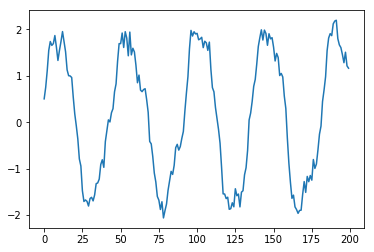

In [22]:
plt.plot(obs_train[0,:,0])

In [13]:
from src.distribution.dirac_delta import dirac_delta
from src.distribution.mvn import mvn
from src.distribution.dirichlet import dirichlet
from src.distribution.poisson import poisson


G_DIST_CLASSES = dict(mvn=mvn, dirichlet=dirichlet, poisson=poisson)

In [16]:
"dirichlet" in G_DIST_CLASSES

True

In [21]:
print(list(G_DIST_CLASSES.keys()))

['mvn', 'dirichlet', 'poisson']


# fhn with dirichelt outputs

In [61]:
hidden_train2, hidden_test2, obs_train2, obs_test2, input_train2, input_test2 = joblib.load("data/fhn_with_inputs_dirichlet")


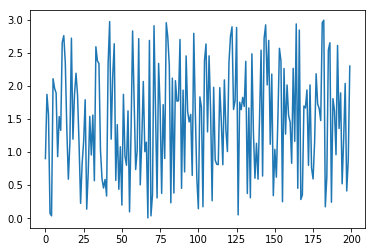

In [62]:
plt.plot(input_train2[0,:,0])

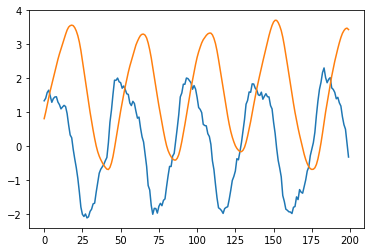

In [63]:
plt.plot(hidden_train2[0,:,0])
plt.plot(hidden_train2[0,:,1])

In [64]:
obs_train2.shape

(200, 200, 3)

In [65]:
obs_train2[0,:10].sum(axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
def plot_bar(t, trial_n, Dy):
    bottom = np.zeros(t)
    plt.figure(figsize=(20,2))
    for y in range(Dy):
        plt.bar(np.arange(t), obs_train2[trial_n,:t,y]*3, bottom=bottom)
        bottom += obs_train2[trial_n, :t, y]*3

    plt.plot(hidden_train2[trial_n,:,0])
    plt.plot(hidden_train2[trial_n,:,1])


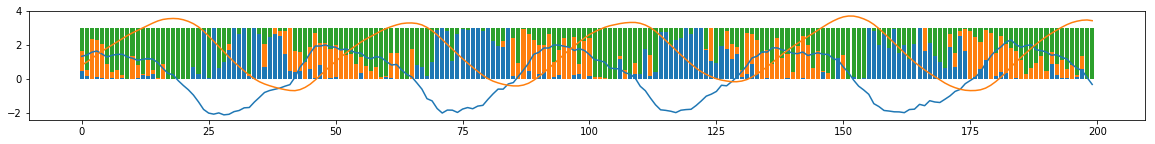

In [72]:
plot_bar(200, 0, 3)

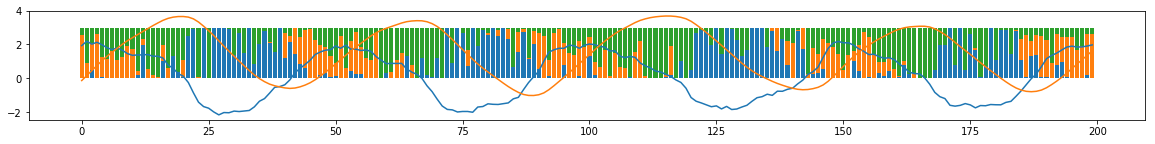

In [73]:
plot_bar(200, 1, 3)

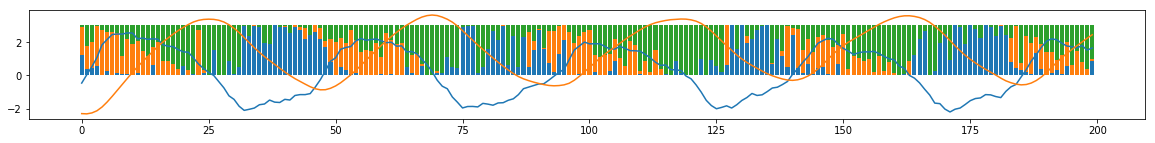

In [74]:
plot_bar(200, 20, 3)